Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [ ]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
# changing column names to lowercase
for col in data.columns:
  data.rename(columns={col:col.lower()}, inplace=True)

In [31]:
data.dropna(inplace=True)

In [8]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# Checking for multicollinearity

1. Correlation

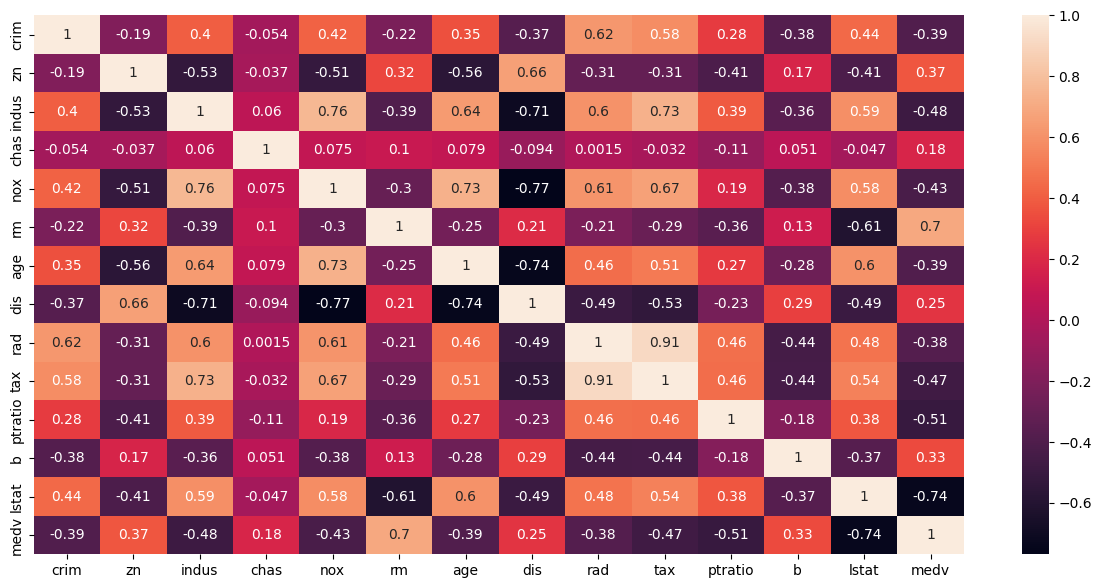

In [14]:
correlation_matrix = data.corr()

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

- A commonly used threshold is to remove features whose correlation does not lie in the range -0.8 and 0.8.
- Here, I am removing features whose correlation does not lie in the range -0.7 and 0.7

In [28]:
threshold = 0.8

# Identify the highly correlated feature pairs
high_corr_features = np.where(np.abs(correlation_matrix.values[:-1,:-1]) >= threshold)

# Create a set to store the features to remove
features_to_remove = set()

# Iterate through the pairs and remove one of the correlated features
for i, j in zip(*high_corr_features):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        # Remove that feature whis has low correlation with target column
        features_to_remove.add(j if np.abs(correlation_matrix['medv']).iloc[i] > np.abs(correlation_matrix['medv']).iloc[j] else i)

# Remove the features from the dataset
filtered_data = data.drop(columns=data.columns[list(features_to_remove)])

2. VARIANCE INFLATION FACTOR

a. calculate VIF for each feature

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = data.drop(columns='medv')

vif_df = pd.DataFrame()
vif_df['Feature'] = features.columns
vif_df['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_df

,Feature,VIF
0,crim,2.011942
1,zn,2.852310
2,indus,14.263622
3,chas,1.147677
4,nox,78.195871
5,rm,83.387397
6,age,22.405731
7,dis,14.367439
8,rad,13.986225
9,tax,58.485821


b. Remove the features with VIF>5

In [37]:
threshold= 5
features_to_drop = vif_df[vif_df['VIF'] >= 5]['Feature'].values.tolist()
filtered_data=  data.drop(columns=features_to_drop)

# 3. Condition Number
if condition number> 30 -> indicates strong multicollinearity

In [39]:
X = data.drop(columns='medv')
np.linalg.cond(X)

8769.640452089625

In [41]:
def remove_features_condition_number(X, threshold):
  condition_number= np.linalg.cond(X)
  if condition_number < threshold:
    return X

  n_features = X.shape[1]
  for i in range(n_features):
    X_temp= X.drop(columns= X.columns[i])
    cond_num_X_temp = np.linalg.cond(X_temp)
    if cond_num_X_temp < threshold:
      return remove_features_condition_number(X_temp, threshold)


  # If no subset of features satisfies (is less than) the condition number threshold, return the original set of features
  return X

threshold = 30
remove_features_condition_number(data.drop(columns='medv'), threshold)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [ ]:
b